# KMeans Clustering
- A critical drawback of hierarchical clustering: runtime
- K means runs significantly faster on large datasets

## Step 1: Generate cluster centers
`kmeans(obs, k_or_guess, iter, thresh, check_finite)`

- obs: standardized observations
- k_or_guess: number of clusters
- iter: number of iterations (default:20)
- thres: threshold i.e the algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold (default:1e-05)
- check_finite: whether to check if observations contain only finite numbers (default:True)

Returns two objects: cluster centers, distortion

### Distortion 
![image-8](image-8.png)


## Step 2: Generate cluster labels
`vq(obs, code_book, check_finite=True)`

- obs: standardized observations
- code_book: cluster centers i.e output of kmeans method
- check_finite: whether to check if observations contain only finite numbers (default:True)

Returns two objects: a list of cluster labels, a list of distortions

In [1]:
import pandas as pd
comic_con = pd.DataFrame({'x_coordinate':[17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17],
                         'y_coordinate':[4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15],
                         })

In [2]:
from scipy.cluster.vq import whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


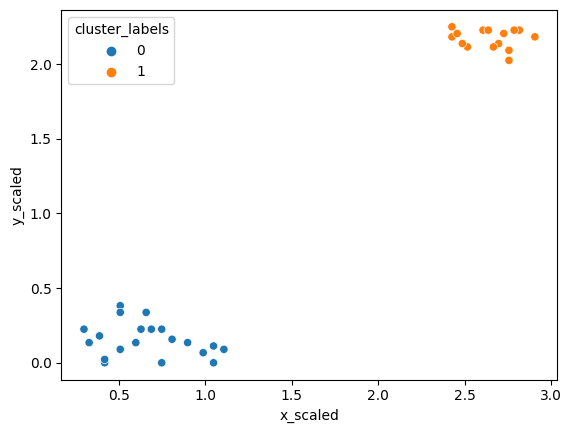

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Determining clusters(k) 

### Distortions revisited
- Distortion: sum of squared distances of points from cluster centers
- Decreases with increasing number of clusters
- Becomes zero when the number of clusters equals the number of points
- Elbow plot: line plot between cluster centers and distortion

## Elbow method 
- Elbow plot: plot of the number of clusters and distortion
- It helps indicate number of clusters present in data

In [4]:
# Declaring variables for use
distortions =[]

num_clusters = range(1,7)

In [5]:
# Population distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(comic_con[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

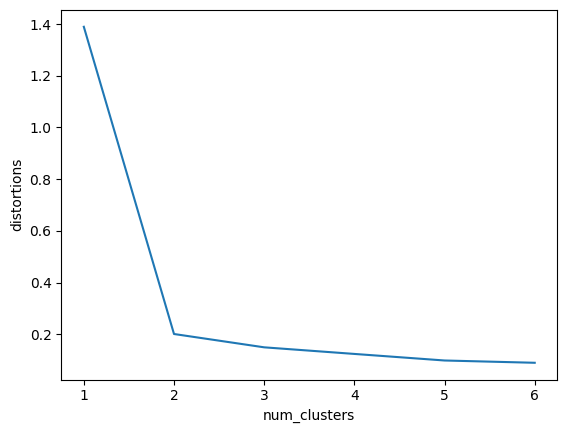

In [6]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters':num_clusters,
                               'distortions':distortions})

sns.lineplot(x='num_clusters', y='distortions',
            data=elbow_plot_data)
plt.show()

Since, the distortion decreases sharply from 1 to 2 clusters, but has very gradual decrease with a subsequent increase in number of clusters. The idea number of clusters here, is 2.

# Impact of seeds on distinct clusters

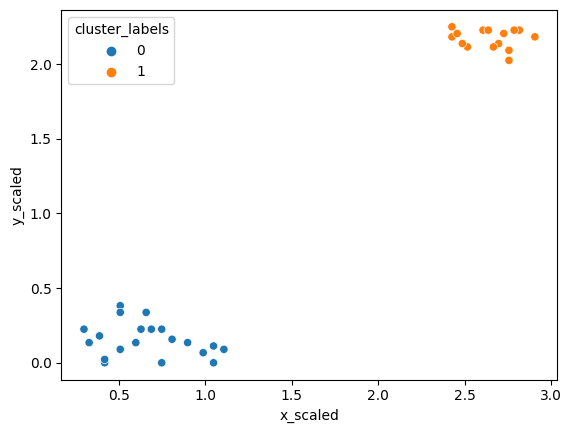

In [7]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

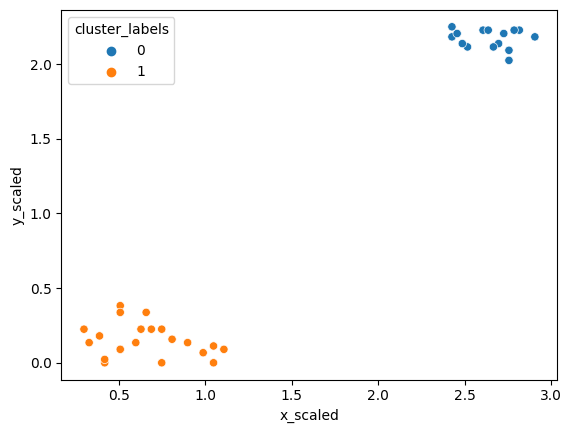

In [8]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

There is no change in the clusters with respect to the seed value in the distinct clusters.

# FIFA 18: defenders revisited

In [11]:
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')
fifa.shape

(1000, 185)

In [18]:
fifa.columns[25:27]

Index(['def', 'phy'], dtype='object')

In [19]:
from scipy.cluster.vq import whiten

fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [21]:
fifa.columns[-2:]

Index(['scaled_def', 'scaled_phy'], dtype='object')

In [31]:
from numpy import random
# Set up a random seed in numpy
random.seed([1000,2000])

In [32]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']])

     scaled_def  scaled_phy  cluster_labels
0      1.649258    9.374085               2
1      1.299416    7.147740               0
2      1.499326    7.030564               0
3      2.099056    9.491261               2
4      2.998652   10.663022               2
..          ...         ...             ...
995    3.748315    8.319501               1
996    3.748315    9.491261               1
997    3.148584    8.553853               1
998    1.749214    9.022557               2
999    0.849618    5.858803               0

[1000 rows x 3 columns]


In [33]:
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


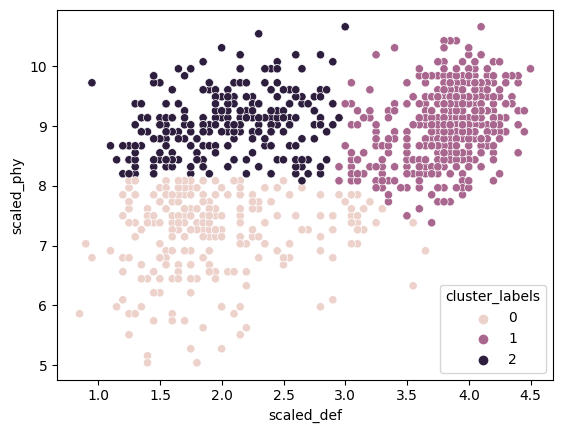

In [34]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()